# k-means

   k     avgdb
1  3  0.831678


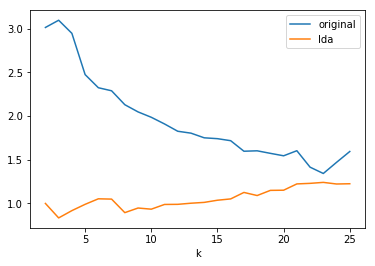

In [39]:
import pandas as pd

lda_avg_db = pd.read_csv('../results/kmeans_lda_avgdb.csv', header=None)
original_avg_db = pd.read_csv('../results/kmeans_original_avgdb.csv', header=None)

lda_avg_db.columns = ['k','avgdb']
original_avg_db.columns = ['k','avgdb']

ax = original_avg_db.plot.line(x=0,y=1, title=False)
ax = lda_avg_db.plot.line(x=0,y=1, ax=ax)

ax.legend(['original','lda'])
fig = ax.get_figure()
fig.savefig('../results/kmeans_lda_original_avgdb.pdf')

print(lda_avg_db[lda_avg_db['avgdb'] == lda_avg_db['avgdb'].min()])

# Agglomerative hierarchical

[INFO] In the 2,..,13 interval, LDA was clearly better:
   cluster_size  db_index
2             4  0.826024
[INFO] But after 23, original was clearly better:
    cluster_size  db_index
36            38  0.713661


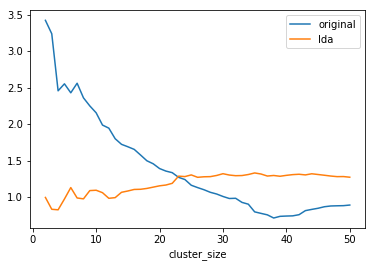

In [65]:
agg_clust_original = pd.read_csv('../results/agg_clustering_original.csv')
agg_clust_lda = pd.read_csv('../results/agg_clustering_lda.csv')

ax = agg_clust_original.plot.line(x='cluster_size',y='db_index')
ax = agg_clust_lda.plot.line(x='cluster_size',y='db_index', ax=ax)

ax.legend(['original','lda'])
fig = ax.get_figure()
fig.savefig('../results/agg_lda_original_db.pdf')

print("[INFO] In the 2,..,13 interval, LDA was clearly better:")
print(agg_clust_lda[agg_clust_lda['db_index'] == agg_clust_lda['db_index'].min()])

print("[INFO] But after 23, original was clearly better:")
print(agg_clust_original[agg_clust_original['db_index'] == agg_clust_original['db_index'].min()])

# CR index

In [69]:
import pandas as pd
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.externals import joblib

def load_dataset(paths):
    '''
    Load the datasets in paths.
    '''
    # load train and test datasets together
    dataset = pd.concat([pd.read_csv(f) for f in paths])
    # keep targets for future comparative purposes
    targets = dataset['cover_type']
    # remove target column
    dataset.drop('cover_type', inplace=True, axis=1)
    # check shape
    print("[INFO] Dataset shape: ", dataset.shape)
    # return
    return (dataset, targets)

_, targets = load_dataset(['../datasets/covertype_norm_train.csv', 
                            '../datasets/covertype_norm_test.csv'])

kmeans_lda_results = pd.read_csv('../results/kmeans_lda_results.csv')
agg_lda_results = pd.read_csv('../results/agg_clustering_lda.csv')
agg_original_results = pd.read_csv('../results/agg_clustering_original.csv')


kmeans_best_results = kmeans_lda_results[kmeans_lda_results['k']==3]
id_best_kmeans_model = kmeans_best_results[kmeans_best_results['db_index']==kmeans_best_results['db_index'].min()].index[0]

agg_best_results = agg_lda_results[agg_lda_results['cluster_size']==4]
id_agg_best_model = agg_best_results[agg_best_results['db_index']==agg_best_results['db_index'].min()].index[0]

agg_best_results_original = agg_original_results[agg_original_results['cluster_size']==38]
id_agg_best_model_original = agg_best_results_original[agg_best_results_original['db_index']==agg_best_results_original['db_index'].min()].index[0]

# load models
kmeans_model = joblib.load('../models/kmeans_lda_best.save')
agg_model = joblib.load('../models/agg_clustering_lda_'+str(id_agg_best_model)+'.save')
agg_model_original = joblib.load('../models/agg_clustering_original_'+str(id_agg_best_model_original)+'.save')

cr_kmeans = adjusted_rand_score(targets, kmeans_model.labels_)
cr_agg = adjusted_rand_score(targets, agg_model.labels_)
cr_agg_original = adjusted_rand_score(targets, agg_model_original.labels_)

print("[INFO] CR kmeans: ", id_best_kmeans_model, cr_kmeans)
print("[INFO] CR agg: ", id_agg_best_model, cr_agg)
print("[INFO] CR agg original: ", id_agg_best_model_original, cr_agg_original)

[INFO] Dataset shape:  (19229, 54)
[INFO] CR kmeans:  1 0.2944744703412936
[INFO] CR agg:  2 0.2212717920072068
[INFO] CR agg original:  36 0.17472259169410276
